In [1]:
import torch
import torchvision
print("PyTorch version:", torch.__version__)
print("Torchvision version:", torchvision.__version__)
print("CUDA is available:", torch.cuda.is_available())


PyTorch version: 2.1.1
Torchvision version: 0.16.1
CUDA is available: True


In [2]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2

In [3]:
!pip install 'git+https://github.com/facebookresearch/segment-anything.git'

  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-oomub75m
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-oomub75m
  Resolved https://github.com/facebookresearch/segment-anything.git to commit 6fdee8f2727f4506cfbbe553e23b895e27956588
  Preparing metadata (setup.py) ... done


In [4]:
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor

In [5]:
image = cv2.imread("fish.jpg")

In [6]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


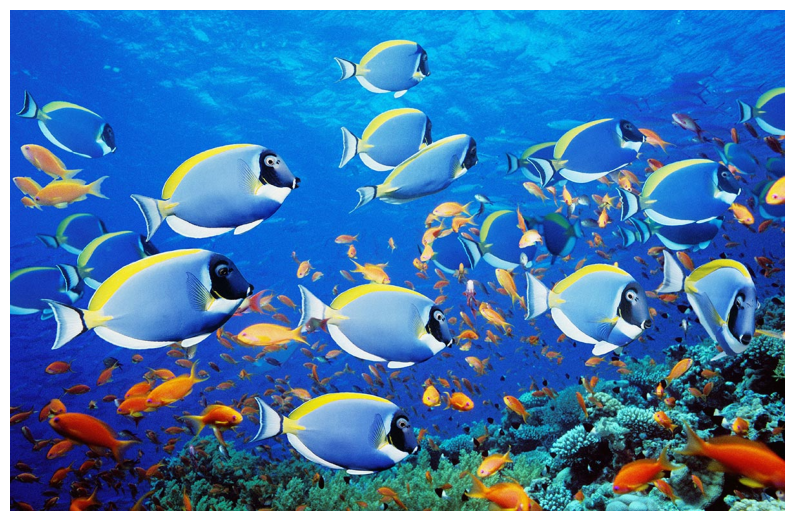

In [7]:
plt.figure(figsize=(10,10))
plt.imshow(image)
plt.axis('off')
plt.show()

In [8]:
sam_checkpoint = "sam_vit_h_4b8939.pth"
model_type = "vit_h"


In [9]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

In [10]:
sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)

In [11]:
sam.to(device)

Sam(
  (image_encoder): ImageEncoderViT(
    (patch_embed): PatchEmbed(
      (proj): Conv2d(3, 1280, kernel_size=(16, 16), stride=(16, 16))
    )
    (blocks): ModuleList(
      (0-31): 32 x Block(
        (norm1): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
        (attn): Attention(
          (qkv): Linear(in_features=1280, out_features=3840, bias=True)
          (proj): Linear(in_features=1280, out_features=1280, bias=True)
        )
        (norm2): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
        (mlp): MLPBlock(
          (lin1): Linear(in_features=1280, out_features=5120, bias=True)
          (lin2): Linear(in_features=5120, out_features=1280, bias=True)
          (act): GELU(approximate='none')
        )
      )
    )
    (neck): Sequential(
      (0): Conv2d(1280, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (1): LayerNorm2d()
      (2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (3): LayerNorm2d

In [12]:
mask_generator_ = SamAutomaticMaskGenerator(
    model=sam,
    points_per_side=32,
    pred_iou_thresh=0.9,
    stability_score_thresh=0.96,
    crop_n_layers=1,
    crop_n_points_downscale_factor=2,
    min_mask_region_area=100,  
)

In [13]:
masks = mask_generator_.generate(image)

In [14]:
print(len(masks))

295


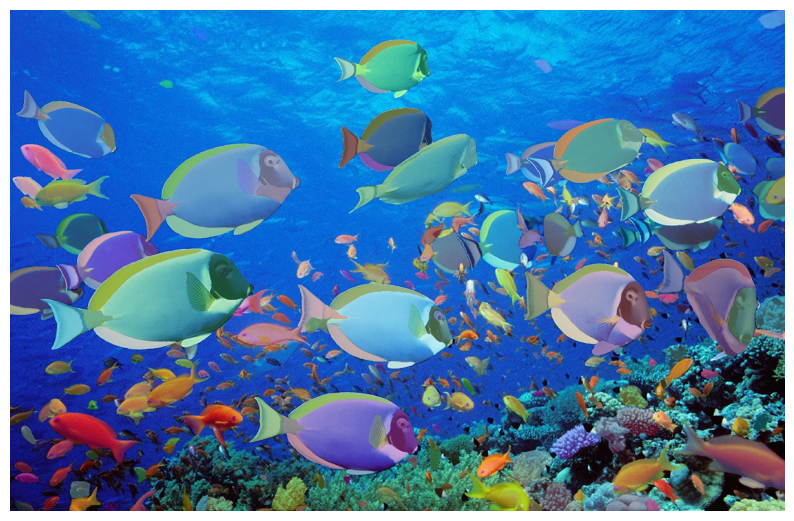

In [15]:
def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)
    polygons = []
    color = []
    for ann in sorted_anns:
        m = ann['segmentation']
        img = np.ones((m.shape[0], m.shape[1], 3))
        color_mask = np.random.random((1, 3)).tolist()[0]
        for i in range(3):
            img[:,:,i] = color_mask[i]
        ax.imshow(np.dstack((img, m*0.35)))


plt.figure(figsize=(10,10))
plt.imshow(image)
show_anns(masks)
plt.axis('off')
plt.show()

In [16]:
image2 = cv2.imread("neurons.jpg")
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

In [17]:
masks2 = mask_generator_.generate(image2)

In [18]:
print(len(masks2))

226


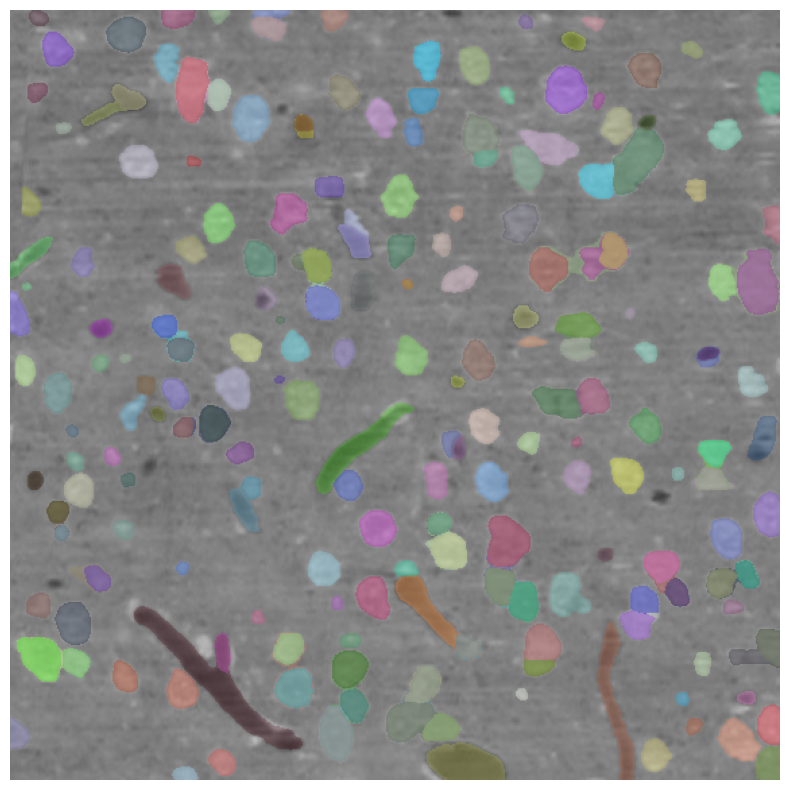

In [19]:
plt.figure(figsize=(10,10))
plt.imshow(image2)
show_anns(masks2)
plt.axis('off')
plt.show()

In [22]:
import supervision as sv

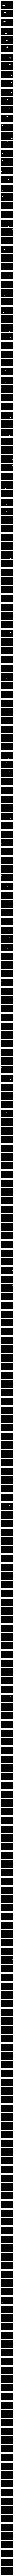

In [29]:
inter = [
    mask['segmentation']
    for mask
    in sorted(masks, key=lambda x: x['area'], reverse=True)
]

sv.plot_images_grid(
    images=inter,
    grid_size=(295, int(len(inter) / 295)),
    size=(250, 250)
)